# Домашнее задание к лекции "Функции и работа с данными"

## Задание 1

Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
- оценка 2 и меньше - низкий рейтинг
- оценка 4 и меньше - средний рейтинг
- оценка 4.5 и 5 - высокий рейтинг

Результат классификации запишите в столбец class

In [5]:
import pandas as pd

DataSet   http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

from      https://grouplens.org/datasets/movielens/latest/

In [9]:
data = pd.read_csv('ratings.csv')
data.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
def classify(rating):
    if rating['rating'] <= 2:
        return 'low'
    elif rating['rating'] <= 4:
        return 'medium'  
    elif rating['rating'] <=5:
        return 'High'

In [12]:
data['class'] = data.apply(classify, axis=1)

data.head(20)

,userId,movieId,rating,timestamp,class
0,1,31,2.5,1260759144,medium
1,1,1029,3.0,1260759179,medium
2,1,1061,3.0,1260759182,medium
3,1,1129,2.0,1260759185,low
4,1,1172,4.0,1260759205,medium
5,1,1263,2.0,1260759151,low
6,1,1287,2.0,1260759187,low
7,1,1293,2.0,1260759148,low
8,1,1339,3.5,1260759125,medium
9,1,1343,2.0,1260759131,low


## Задание 2

Используем файл keywords.csv.

Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце ‘region’ пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим ‘undefined’.

Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:

geo_data = {

'Центр': ['москва', 'тула', 'ярославль'],

'Северо-Запад': ['петербург', 'псков', 'мурманск'],

'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

Результат классификации запишите в отдельный столбец region.

In [20]:
data = pd.read_csv('keywords.csv')
geo_data = {'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск'] 
           }
data.head()

,keyword,shows
0,вк,64292779
1,одноклассники,63810309
2,порно,41747114
3,ютуб,39995567
4,вконтакте,21014195


In [27]:
#функция проходится по словарю и вложенному списку geo_data и сразнивает значение city со столбцом keywords в датафрейме,
#if true, возвращает ключ словаря
def geo_classify(df):
    for region, cities in geo_data.items():
        for city in cities:
            if city in df.keyword:
                return region
    return 'undefined'
#сшивает и сверяет 2 словаря

In [26]:
%%time
#довавим столбец регион к датафрейму и применим ф-цию
data['region'] = data.apply(geo_classify, axis=1)

data[data.region.str.contains('Центр|Северо-Запад|Дальний Восток', regex=True)].head()

Wall time: 11.2 s


,keyword,shows,region
127,авито москва,979292,Центр
370,авито ру санкт петербург,425134,Северо-Запад
564,погода в санкт петербурге,292489,Северо-Запад
849,авито ярославль,209581,Центр
1063,фарпост владивосток,176951,Дальний Восток


In [25]:
data.region.value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

## Задание 3 

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

    - для каждой строки пройдите по всем годам списка years
    - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
    - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
1. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

3. Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

In [34]:
movies_data = pd.read_csv('ml-latest-small/movies.csv')
movies_data.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [43]:
#список лет
years = list(map(str, range(1950, 2019)))


In [44]:
#Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска.
def production_year(title):
    for year in years:
        if year in title:
            return int(year)
    return 1900

In [49]:
#Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’
movies_data['year'] = movies_data.title.apply(production_year)
movies_data.head()

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995


In [50]:
movies_data.year.value_counts()

1900    467
1996    275
2000    274
1998    272
2002    271
       ... 
1956     32
1958     31
1950     27
1952     27
1951     23
Name: year, Length: 68, dtype: int64

In [51]:
#merge dataframe with movies year + raitings
ratings_data = pd.read_csv('ml-latest-small/ratings.csv')
ratings_data.head(10)
merged_data = ratings_data.merge(movies_data, on='movieId', how='left')
merged_data

,userId,movieId,rating,timestamp,title,genres,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,1995
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,1900
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,1996
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,1981
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,1989
...,...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance,2002
100000,671,6269,4.0,1065149201,Stevie (2002),Documentary,2002
100001,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX,2003
100002,671,6385,2.5,1070979663,Whale Rider (2002),Drama,2002


In [57]:
#Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга
rating_year = merged_data.groupby('year').agg({'rating': 'mean'}).sort_values(by="rating", ascending=False).head()
rating_year

,rating
year,
1957,4.014241
1972,4.011136
1952,4.000000
1954,3.994220
1951,3.983539


In [59]:
%matplotlib inline

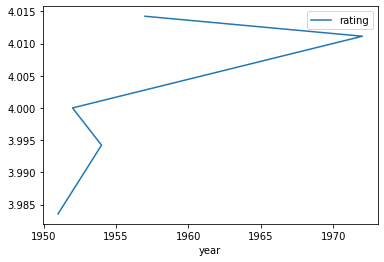

In [61]:
rating_year.plot()